<a href="https://colab.research.google.com/github/Saeif-Saleh/AppPortfolio/blob/master/BPSK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.io

In [0]:
#Loading the two Hackrf matlab files using Scipy
first=scipy.io.loadmat('/content/drive/My Drive/first.mat')
second=scipy.io.loadmat('/content/drive/My Drive/second.mat')

In [0]:
#Reading all the IQ values
nf = np.asarray(first['M'], dtype=np.float64)
sf=np.asarray(second['M'], dtype=np.float64)

In [6]:
print(len(nf))
print(len(sf))

130982912
133454848


In [0]:
import matplotlib.pyplot as plt

In [0]:
#/Loading 1e6 IQ samples for the two hackrf
hckrf1=nf[50000000:101280000]
hckrf2=sf[50000000:101280000]


In [8]:
#Visualzing the IQ values of the first hackrf
plt.scatter(hckrf1[:,0],hckrf1[:,1])
plt.show()

NameError: ignored

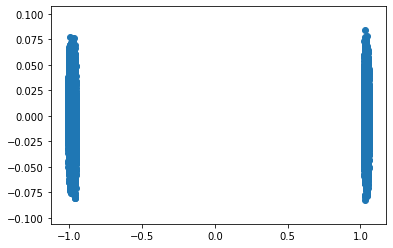

In [0]:
#Visualzing the IQ values of the second hackrf
plt.scatter(hckrf2[:,0],hckrf2[:,1])
plt.show()

In [0]:
#Reshaping the data to be of vector shape 128x2
hckrf1=hckrf1.reshape(-1,128,2)
hckrf2=hckrf2.reshape(-1,128,2)


In [0]:
print(hckrf1[0])

[[ 1.05355406e+00 -9.40179825e-03]
 [-9.98881340e-01  3.25852931e-02]
 [ 1.04675651e+00 -1.77960992e-02]
 [-9.79795635e-01 -1.51116550e-02]
 [-9.69240010e-01 -2.16162205e-03]
 [ 1.04623532e+00 -4.92411852e-03]
 [-9.88880038e-01 -1.23164058e-03]
 [ 1.03559685e+00  9.00286436e-03]
 [-9.70656753e-01  8.28728080e-03]
 [-9.63813663e-01 -1.12418830e-02]
 [ 1.04430437e+00 -9.99450684e-03]
 [-9.91481185e-01 -1.70778930e-02]
 [ 1.04565501e+00  9.43619013e-03]
 [-9.80925977e-01  5.03128767e-03]
 [-9.74196196e-01 -4.40204144e-03]
 [ 1.05532479e+00 -2.25326419e-03]
 [-9.97582018e-01 -3.91837955e-03]
 [ 1.04485118e+00 -2.59678662e-02]
 [-9.78060484e-01  2.69618630e-03]
 [-9.68932748e-01 -4.01985645e-03]
 [ 1.04244864e+00  6.13403320e-03]
 [-9.86461043e-01  3.47969532e-02]
 [ 1.03302169e+00 -8.71935487e-03]
 [-9.73727286e-01 -2.67207921e-02]
 [-9.66191053e-01  8.62658024e-04]
 [ 1.04537296e+00 -4.27553058e-03]
 [-9.95864153e-01  1.01878047e-02]
 [ 1.04395711e+00 -1.61651671e-02]
 [-9.86145258e-01  1

In [30]:
#Concatenating the two arrays of the two hackrf
data=np.concatenate((hckrf1,hckrf2),axis=0)
print(data.shape)
print(len(data))

(801250, 128, 2)
801250


In [32]:
#Creating label for the classes 0 for the first class and 1 for the second class
data_labels=np.zeros(len(data))
data_labels[0:int(len(data_labels)/2)]=0
data_labels[int(len(data_labels)/2):]=1
print(len(data_labels))

801250


In [84]:
#Using keras to convert training labels values to one hot encoding
from keras.utils import to_categorical
data_labels=to_categorical(data_labels)


[[[1. 0.]
  [0. 1.]]

 [[0. 1.]
  [1. 0.]]]


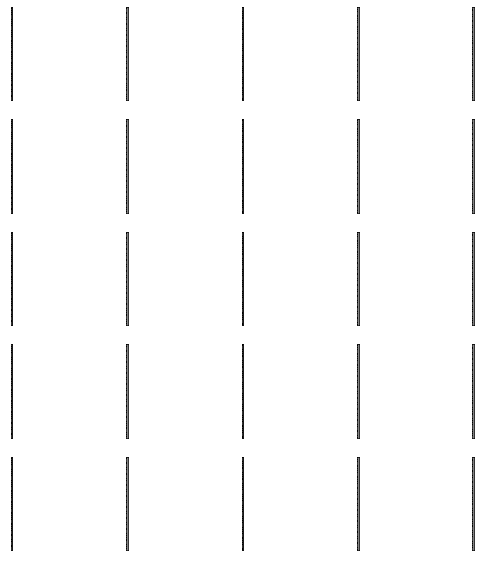

In [34]:
#Visualzing 25 samples of size 128x2
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap=plt.cm.binary)

plt.show()

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD


In [0]:
#Buidling a model using regular neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 2)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
     keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
     keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
    
])

In [0]:
#Creating Validation Data
data_test1=nf[110000000:111280000]
data_test2=sf[110000000:111280000]
data_for_test=np.concatenate((data_test1,data_test2),axis=0)

data_for_test=data_for_test.reshape(-1,128,2)

In [0]:
#Creating labels for the test 0 for the first class and 1 for the second class
test_labels=np.zeros(len(data_for_test))
test_labels[0:int(len(data_for_test)/2)]=0
test_labels[int(len(data_for_test)/2):]=1
test_labels=to_categorical(test_labels)

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=model.fit(data, data_labels, validation_data=(data_for_test,test_labels), epochs=15)




Train on 801250 samples, validate on 20000 samples
Epoch 1/15





801250/801250 [==============================] - 160s 200us/step - loss: 0.0933 - acc: 0.9646 - val_loss: 0.2774 - val_acc: 0.8546
Epoch 2/15
801250/801250 [==============================] - 155s 194us/step - loss: 0.0612 - acc: 0.9791 - val_loss: 0.0741 - val_acc: 0.9683
Epoch 3/15
801250/801250 [==============================] - 156s 195us/step - loss: 0.0559 - acc: 0.9808 - val_loss: 0.0765 - val_acc: 0.9768
Epoch 4/15
801250/801250 [==============================] - 156s 194us/step - loss: 0.0544 - acc: 0.9818 - val_loss: 0.0728 - val_acc: 0.9735
Epoch 5/15
801250/801250 [==============================] - 157s 196us/step - loss: 0.0532 - acc: 0.9823 - val_loss: 0.0871 - val_acc: 0.9649
Epoch 6/15
801250/801250 [==============================] - 154s 192us/step - loss: 0.0519 - acc: 0.9827 - val_loss: 0.0692 - val_acc: 0.9762
Epoch 7/15
801250/801250 [==============================] - 155s 194us/step - loss: 0.052

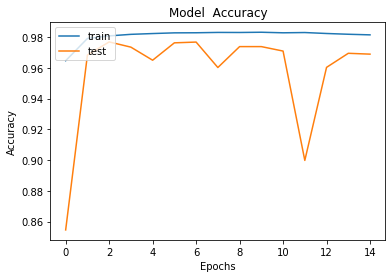

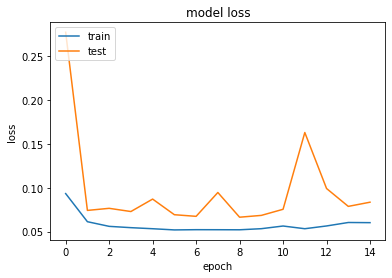

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# test_labels=np.zeros(len(data_for_test))
# test_labels[0:int(len(data_for_test)/2)]=0
# test_labels[int(len(data_for_test)/2):]=1
data_for_test=data_for_test.reshape(-1,128,2)
y_pred=model.predict_classes(data_for_test)
import tensorflow as tf
con_mat =  tf.compat.v1.confusion_matrix(labels=test_labels, predictions=y_pred)


In [93]:
print(con_mat.eval())

ValueError: ignored

Confusion Matrix


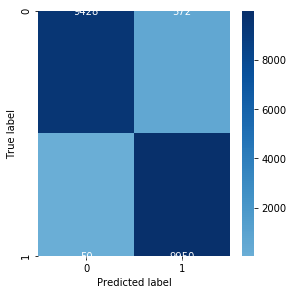

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

data_for_test=data_for_test.reshape(-1,128,2)
Y_pred =model.predict_classes(data_for_test)
classes=['h1','h2']
print('Confusion Matrix')
con_mat=confusion_matrix(test_labels, Y_pred)

con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt='d',center=1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
# #Testing model using normal neural networks
new_test=sf[9000000:9128000]
# new_test=sf[110000000:111280000]
# print(len(new_test))

new_test=new_test.reshape(-1,128,2)
print(new_test.shape)

for img in new_test:
  print(model.predict_classes(img.reshape(-1,128,2)))


In [0]:
import os
# plotting the metrics


print(model.history['acc'])


In [0]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


In [114]:
#Reshaping data for the convolutional model
img_rows=128
img_cols=2
data = data.reshape(data.shape[0], img_rows, img_cols, 1)
data_for_test = data_for_test.reshape(data_for_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('data shape:', data.shape) #data shape: (60000, 28, 28, 1)

data shape: (801250, 128, 2, 1)


In [59]:
##model convolutional model
conv_model = Sequential()
#convolutional layer with rectified linear unit activation
conv_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding="same",
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
conv_model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
conv_model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
conv_model.add(Flatten())
#fully connected to get all relevant data
conv_model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
conv_model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
conv_model.add(Dense(2, activation='softmax'))

In [0]:
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 2, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 2, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 1, 64)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 1, 64)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [62]:
conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model for 15 epochs
history=conv_model.fit(data, data_labels, validation_data=(data_for_test,test_labels), epochs=15)

Train on 801250 samples, validate on 20000 samples
Epoch 1/15
801250/801250 [==============================] - 234s 292us/step - loss: 0.0289 - acc: 0.9894 - val_loss: 0.0165 - val_acc: 0.9943
Epoch 2/15
801250/801250 [==============================] - 229s 286us/step - loss: 0.0125 - acc: 0.9958 - val_loss: 0.0047 - val_acc: 0.9980
Epoch 3/15
801250/801250 [==============================] - 229s 286us/step - loss: 0.0070 - acc: 0.9977 - val_loss: 0.0024 - val_acc: 0.9992
Epoch 4/15
801250/801250 [==============================] - 230s 287us/step - loss: 0.0057 - acc: 0.9982 - val_loss: 6.5500e-04 - val_acc: 0.9998
Epoch 5/15
801250/801250 [==============================] - 230s 287us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 2.7794e-04 - val_acc: 0.9999
Epoch 6/15
801250/801250 [==============================] - 231s 288us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 1.3747e-04 - val_acc: 1.0000
Epoch 7/15
801250/801250 [==============================] - 229s 285us/step - loss: 0

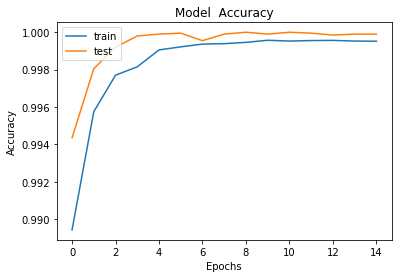

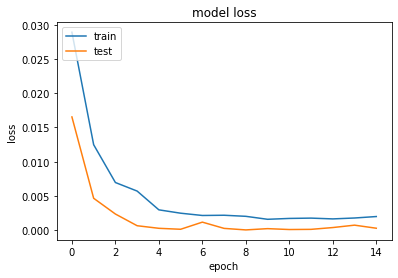

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion Matrix


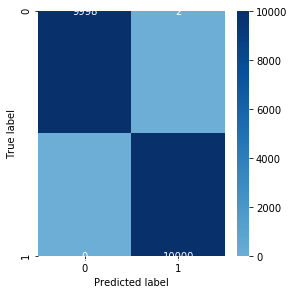

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Y_pred =conv_model.predict_classes(data_for_test)
classes=['h1','h2']
print('Confusion Matrix')
con_mat=confusion_matrix(test_labels, Y_pred)

con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt='d',center=1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [0]:
#Model of paper
# model_Conv = Sequential()
# model_Conv.add(Conv2D(50, (1, 3), activation='relu',input_shape=input_shape))
# model_Conv.add(MaxPooling2D(pool_size=(2, 2)))
# model_Conv.add(Dropout(0.25))
# model_Conv.add(Conv2D(50, (2, 3), activation='relu'))
# model_Conv.add(MaxPooling2D(pool_size=(2, 2)))
# model_Conv.add(Dropout(0.25))
# model_Conv.add(Flatten())
# model_Conv.add(Dense(256, activation='relu'))
# model_Conv.add(Dropout(0.5))
# model_Conv.add(Dense(2, activation='softmax'))

In [0]:
trial=data_for_test[9888:11100]
for img in trial:

  img=(np.expand_dims(img,0))
  print(model.predict_classes(img))